In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import dask.dataframe as dd

In [2]:
train_data_section = pd.read_csv("data/train.csv", iterator=False, chunksize=1024)
train = train_data_section.get_chunk()
train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN


In [3]:
stores = pd.read_csv("data/stores.csv")
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [4]:
items = pd.read_csv("data/items.csv")
items.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [5]:
transactions = pd.read_csv("data/transactions.csv")
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


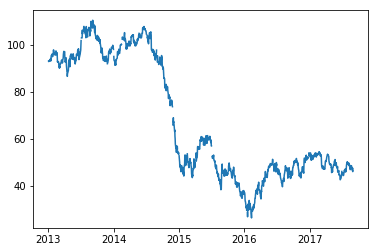

In [6]:
oil = pd.read_csv("data/oil.csv")
plt.plot(oil['date'].astype('datetime64[D]'), oil['dcoilwtico'].values)

In [7]:
holidays = pd.read_csv("data/holidays_events.csv")
holidays

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False


In [8]:
train_df = dd.read_csv("data/train.csv")

In [9]:
some_df = train_df.loc[(train_df['store_nbr'] == 25) & (train_df['item_nbr'] == 103665)]

In [10]:
some_unit_sales = some_df['unit_sales'].compute()

C:\Users\xiaoyu\.edm\envs\mle3\lib\site-packages\dask\local.py:290: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  result = _execute_task(task, data)


In [11]:
some_dates = some_df['date'].compute()

C:\Users\xiaoyu\.edm\envs\mle3\lib\site-packages\dask\local.py:290: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  result = _execute_task(task, data)


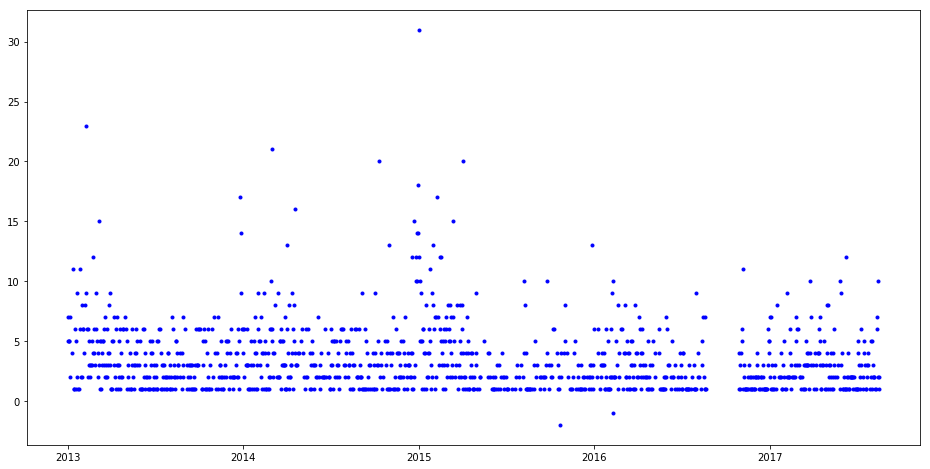

In [23]:
plt.figure(figsize=(16,8))
plt.plot(some_dates.astype("datetime64[D]"), some_unit_sales, 'b.')

In [13]:
train_df['item_nbr'].value_counts().compute()

C:\Users\xiaoyu\.edm\envs\mle3\lib\site-packages\dask\local.py:290: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  result = _execute_task(task, data)


502331     83475
314384     83450
364606     83308
265559     83047
559870     82513
1036689    82134
273528     82108
564533     82086
261052     81774
414353     81755
1084881    81324
839363     81268
850333     81097
414750     81091
847863     80947
581078     80776
1047679    80713
258396     80574
759893     80499
841842     80419
215331     80119
265279     80048
1052563    79937
807493     79885
1047685    79832
567623     79783
1047790    79680
165594     79648
564534     79625
1047681    79603
           ...  
2120723       28
1976284       25
2114752       25
2123036       23
2123791       21
2121690       19
2011457       18
2011470       17
2011437       16
2123839       13
2121610       13
2123711       12
2116139       12
2123863       12
2126842       12
2011448       10
2123859       10
2116132       10
2011468        9
2011459        9
2123790        8
2116238        7
2123463        5
2123209        5
2122947        5
2126944        5
2123747        3
2122818       

4036 different items...

In [27]:
train_df['onpromotion'].describe().compute()

C:\Users\xiaoyu\.edm\envs\mle3\lib\site-packages\dask\local.py:290: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  result = _execute_task(task, data)
C:\Users\xiaoyu\.edm\envs\mle3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    1.038394e+08
mean     7.521830e-02
std      2.637433e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
dtype: float64

In [29]:
len(items)

4100

That is 4100 diferent items... 4100 - 4036 = 64 items in test set won't be seen in train set?

In [30]:
idx = (train_df['store_nbr'] == 25) & (train_df['item_nbr'] == 103665)

In [34]:
train_df.loc[idx, ['date', 'unit_sales', 'onpromotion']].compute()

C:\Users\xiaoyu\.edm\envs\mle3\lib\site-packages\dask\local.py:290: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  result = _execute_task(task, data)


,date,unit_sales,onpromotion
0,2013-01-01,7.0,NaN
19811,2013-01-02,5.0,NaN
100696,2013-01-04,5.0,NaN
141831,2013-01-05,5.0,NaN
183815,2013-01-06,7.0,NaN
224881,2013-01-07,2.0,NaN
380595,2013-01-11,4.0,NaN
421045,2013-01-12,11.0,NaN
504273,2013-01-14,1.0,NaN
543646,2013-01-15,1.0,NaN


In [36]:
items['family'].value_counts()

GROCERY I                     1334
BEVERAGES                      613
CLEANING                       446
PRODUCE                        306
DAIRY                          242
PERSONAL CARE                  153
BREAD/BAKERY                   134
HOME CARE                      108
DELI                            91
MEATS                           84
HOME AND KITCHEN I              77
LIQUOR,WINE,BEER                73
FROZEN FOODS                    55
POULTRY                         54
HOME AND KITCHEN II             45
EGGS                            41
CELEBRATION                     31
PREPARED FOODS                  26
LAWN AND GARDEN                 26
LADIESWEAR                      21
AUTOMOTIVE                      20
LINGERIE                        20
BEAUTY                          19
PLAYERS AND ELECTRONICS         17
SCHOOL AND OFFICE SUPPLIES      15
GROCERY II                      14
PET SUPPLIES                    14
SEAFOOD                          8
MAGAZINES           

In [37]:
items['class'].value_counts()

1016    133
1040    110
1124    100
1034     98
1122     81
1072     70
1032     65
1148     62
1120     61
3020     60
2302     59
1026     54
3106     53
1042     51
1030     51
1028     48
1114     42
3034     41
2006     41
1190     40
4126     40
1074     39
1004     39
1142     37
1126     36
2502     36
2420     36
3046     35
1144     35
2008     34
       ... 
1018      1
6393      1
1336      1
6301      1
1380      1
6022      1
2024      1
4139      1
6230      1
6238      1
4255      1
6322      1
6426      1
2340      1
2412      1
2640      1
2784      1
2864      1
1005      1
1029      1
1041      1
3116      1
1089      1
1153      1
4140      1
2103      1
6233      1
4212      1
4228      1
6155      1
Name: class, Length: 337, dtype: int64

In [39]:
items.loc[items['class'] == 1040]

,item_nbr,family,class,perishable
33,115693,GROCERY I,1040,0
113,169028,GROCERY I,1040,0
166,215327,GROCERY I,1040,0
167,215331,GROCERY I,1040,0
168,215332,GROCERY I,1040,0
315,315277,GROCERY I,1040,0
316,315279,GROCERY I,1040,0
328,318787,GROCERY I,1040,0
397,364829,GROCERY I,1040,0
398,364832,GROCERY I,1040,0
